# Projeto 3 - Clusterização de dados de vendas de produtos
## Wholesale customers Data Set - UCI

## Introdução

O conjunto de dados de vendas esta localizado na plataforma UCI no seguinte link - https://archive.ics.uci.edu/ml/datasets/Wholesale+customers. Este é um conjunto de dados que não possui rotulo, o nosso desafio será agrupar essas vendas em grupos e avaliar estes grupos.

Segue a descrição das variaveis:
- FRESH: gastos anuais em produtos frescos
- MILK: gastos anuais em produtos lácteos
- GROCERY: gastos anuais em produtos de mercearia
- FROZEN: gastos anuais em produtos congelados
- DETERGENTS_PAPER: gastos anuais em detergentes e produtos de papel
- DELICATESSEN: gastos anuais em produtos artesanais (queijos, vinhos, doces)
- CHANNEL: origem do cliente - Horeca (Hotel/Restaurante/Café) (1) ou canais de varejo (2)
- REGION: região do cliente Lisbon (1), Oporto (2) or Other Region (3)

#### referencia: 
Abreu, N. (2011). Analise do perfil do cliente Recheio e desenvolvimento de um sistema promocional. Mestrado em Marketing, ISCTE-IUL, Lisbon

# Sobre este projeto

Neste projeto treine os conhecimentos aprendidos até o momento e que entenda algumas das dificuldades que pode ter quando for aplicar os mesmos. 

Os principais pontos que serão avaliados:

- Levantamento de hipoteses
- Manipulação de dados e criação de gráficos simples com o `Pandas`
- Criar um modelo clusterização e justificar

# Preparação do ambiente

- Acessem o link - https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv e faça o download do conjunto de dados.

In [ ]:
import pandas as pd
import numpy as np

from scipy.stats import zscore # Tratamento de outliers

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import silhouette_score

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv('/content/Wholesale customers data.csv')

In [ ]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


# Análise das variáveis

(440, 8) 


Coluna Channel

count    440.000000
mean       1.322727
std        0.468052
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: Channel, dtype: float64 

Nulos: False

[2 1]


---------------------------------------------------------------------------------------------


Coluna Region

count    440.000000
mean       2.543182
std        0.774272
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Region, dtype: float64 

Nulos: False

[3 1 2]


---------------------------------------------------------------------------------------------


Coluna Fresh

count       440.000000
mean      12000.297727
std       12647.328865
min           3.000000
25%        3127.750000
50%        8504.000000
75%       16933.750000
max      112151.000000
Name: Fresh, dtype: float64 

Nulos: False

[ 12669   7057   6353  13265  22615   9413  12126   7579   5963   6006
   3366  13146  31714  

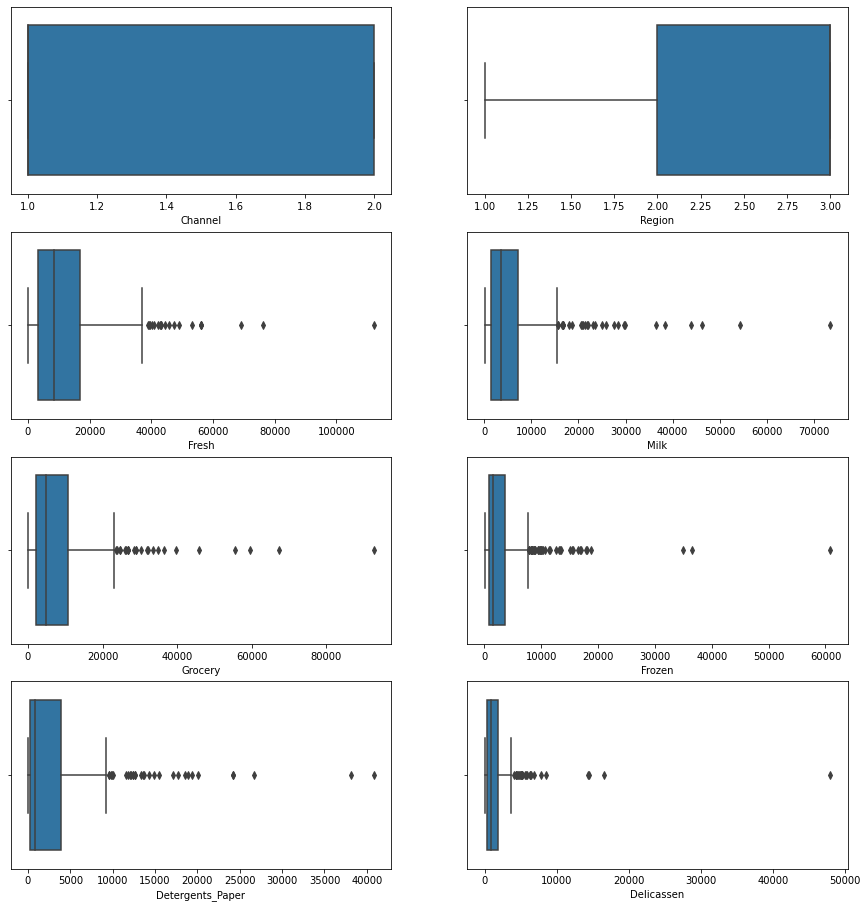

In [ ]:
print(df.shape,"\n\n")
plt.subplots(4, 2, figsize=(15,20))
for i in range(0,len(df.columns)):
  print(f"Coluna {df.columns[i]}\n")
  print(df.iloc[:,i].describe(),"\n")
  print(f"Nulos: {df.iloc[:,i].isnull().any()}\n")
  print(df.iloc[:,i].unique())
  print("\n\n---------------------------------------------------------------------------------------------\n\n")
  plt.subplot(5, 2, i+1)
  sns.boxplot(x = df.iloc[:,i])

plt.show()

# Tratamento dos Outliers listados na análise acima

Como possuímos Outliers e nessa situação podem se tratar de qualquer tipo de erro, temos que tratá-los.
Além disso, o algoritmo Kmeans é sensível a outliers.  
Decidi eliminar as observações que contém valores discrepantes através do zscore (metodo do desvio padrão apresentado em aula).

In [ ]:
Z = zscore(df.drop(['Channel','Region'],axis=1).copy())
Z = zscore(Z)
Z = pd.DataFrame(Z)

Z.tail()

,0,1,2,3,4,5
435,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091
436,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501
437,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456
438,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046
439,-0.729307,-0.555924,-0.573227,-0.620094,-0.504888,-0.522869


In [ ]:
# zscore mostra como uma medida está acima ou abaixo da média em z desvios padrões
# um zscore de 2 mostra que a medida é [Média + 2*DesvioPadrão]
# um zscore de 3 mostra que a medida é [Média + 3*DesvioPadrão]
# Qualquer amostra com zscore acima de 2 será eliminada.

for i in Z.columns:
  Z = Z.drop(Z[Z[i] >= 2].index)

df_tratado = df.iloc[Z.index]
print(f"{df_tratado.shape[0]} linhas")

df_tratado.reset_index(inplace=True, drop=True)
df_tratado.tail()

378 linhas


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
373,1,3,21117,1162,4754,269,1328,395
374,1,3,1982,3218,1493,1541,356,1449
375,1,3,16731,3922,7994,688,2371,838
376,1,3,10290,1981,2232,1038,168,2125
377,1,3,2787,1698,2510,65,477,52


# Exercicio 1. (3.0 pontos)

Faça um gráfico de cotovelo, quantos clusters aproximadamente melhor separam este conjunto de dados informado pelo grafico de cotovelo?

In [ ]:
#### VALE 0.5 pontos
#### CONSTRUA OS SEUS GRAFICOS ABAIXO, USE MAIS CELULAS SE NECESSARIO

# Antes de qualquer coisa, quando analisamos as variaveis, notamos que os atributos 'Channel' e 'Region' são variáveis categóricas apesar de possuirem valores númericos.
# Nessa situação, considerando ainda que usaremos o K-Means para a separação dos clusters, variáveis categóricas não podem entrar no modelo.
# Kmeans assume variáveis numéricas e continuas para que sejam agrupadas de acordo com as menores distancias médias.
# Variáveis binárias não são continuas então não podem ser agrupadas por um algoritmo baseado em distancias.

X = df_tratado.drop(['Channel','Region'],axis=1).copy()

X = pd.DataFrame(StandardScaler().fit_transform(X), columns=X.columns)

In [ ]:
print(f"{X.shape[0]} linhas")
X.head()

378 linhas


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.335310,1.417955,0.242617,-0.862203,0.220262,0.144401
1,-0.339076,1.459441,0.603494,-0.234976,0.455370,0.534749
2,0.406931,-0.861088,-0.357946,1.645896,-0.602806,0.545444
3,1.530507,0.274123,0.177346,0.637389,-0.120436,3.572868
4,-0.055959,1.041616,-0.195219,-0.679059,-0.113599,0.245107


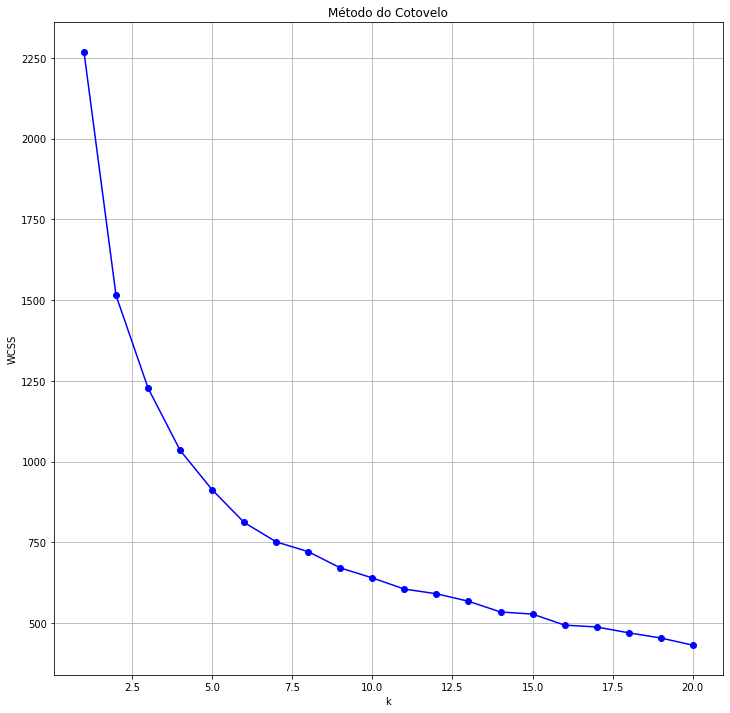

In [ ]:
WCSS = []

K = range(1,21)

for i in K:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(X)
  WCSS.append(kmeans.inertia_)

plt.figure(figsize=(12,12))
plt.plot(K, WCSS, '-bo')
plt.grid(True)
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title("Método do Cotovelo")

plt.show()

In [ ]:
# Do gráfico de cotovelo, temos o intervalo entre 4 e 7. Dentre os valores precisamos de métricas para escolher o melhor valor de K
K = range(4,8)

for i in K:
  Kmedia_predict = KMeans(n_clusters=i, random_state=10).fit_predict(X)
  print(f"K-médias com k = {i}")
  print(f'Silhouette Score: {silhouette_score(X, Kmedia_predict, metric="euclidean")} \n')

K-médias com k = 4
Silhouette Score: 0.3263845438447675 

K-médias com k = 5
Silhouette Score: 0.2625230585266316 

K-médias com k = 6
Silhouette Score: 0.2670844664681576 

K-médias com k = 7
Silhouette Score: 0.26379029763812256 



**RESPOSTA** (VALE 1.0 ponto):   
De acordo com o gráfico de cotovelo, o intervalo de 4 a 7 seria o ideal. Através do Silhouette Score validamos k = 4 como o nº ideal de clusters

Construa um modelo de **clusterização K-Médias** usando o melhor numero de clusters informado pelo gráfico de cotovelo e usem o parametro **random_state** com valor 10.

In [ ]:
#### VALE 0.5 pontos
#### EXECUTE OS COMANDOS ABAIXO, USE MAIS CELULAS SE NECESSARIO

kmedia_predict =  KMeans(n_clusters=4,random_state = 10).fit_predict(X)

Adicione o resultado da clusterização no conjunto de dados original, chame essa nova variavel de **cluster** e conte quantas observações há em cada cluster e preencha:

In [ ]:
#### VALE 0.5 pontos
#### EXECUTE OS COMANDOS ABAIXO, USE MAIS CELULAS SE NECESSARIO

df_tratado['cluster'] = kmedia_predict

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
clusters = np.sort(df_tratado['cluster'].unique()) # Organizando os clusters em ordem crescente.
elementos = []

for i in clusters:
  elementos.append(df_tratado[df_tratado['cluster'] == i].shape[0])

elementos

[53, 80, 193, 52]

In [ ]:
#### VALE 0.5 pontos
# Substitua __ pelos valores solicitados
print('Total de observações do cluster 1: {}'.format(elementos[0]))
print('Total de observações do cluster 2: {}'.format(elementos[1]))
print('Total de observações do cluster 3: {}'.format(elementos[2]))
print('Total de observações do cluster 4: {}'.format(elementos[3]))
# copie a linha de cima, alterando o cluster e preenchendo o total

Total de observações do cluster 1: 53
Total de observações do cluster 2: 80
Total de observações do cluster 3: 193
Total de observações do cluster 4: 52


# Exercicio 2. (4.0 pontos)

Escolha dois clusters e separe os dados em dois subconjuntos, chamando-os de clusterA e clusterB.

In [ ]:
#### VALE 1.0 ponto
#### EXECUTE OS COMANDOS ABAIXO, USE MAIS CELULAS SE NECESSARIO

clusterA = df_tratado[df_tratado['cluster'] == 0]
clusterB = df_tratado[df_tratado['cluster'] == 3]

Utilizaremos a função **.describe()** para obtermos as medidas de média, desvio padrão, valor minimo e valor máximo dos subconjuntos clusterA e clusterB

In [ ]:
#### VALE 1.0 ponto
#### EXECUTE O COMANDO ABAIXO PARA clusterA

clusterA.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.0
mean,1.452830,2.622642,16182.566038,6656.509434,7595.433962,2040.490566,1976.339623,2944.471698,0.0
std,0.502533,0.739709,9119.248659,3487.185683,3640.639264,1857.546859,1505.901467,1409.750450,0.0
min,1.000000,1.000000,18.000000,1222.000000,1447.000000,127.000000,20.000000,288.000000,0.0
25%,1.000000,3.000000,8708.000000,4257.000000,5034.000000,839.000000,603.000000,2005.000000,0.0
50%,1.000000,3.000000,17063.000000,6200.000000,7198.000000,1504.000000,1795.000000,2631.000000,0.0
75%,2.000000,3.000000,22647.000000,7504.000000,9694.000000,2540.000000,2767.000000,3271.000000,0.0
max,2.000000,3.000000,34454.000000,18664.000000,16966.000000,9510.000000,5058.000000,6854.000000,0.0


In [ ]:
#### VALE 1.0 ponto
#### EXECUTE O COMANDO ABAIXO PARA clusterB

clusterB.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.0
mean,1.076923,2.461538,15996.519231,2844.480769,3238.923077,7226.038462,542.596154,1105.173077,3.0
std,0.269069,0.827506,9430.148583,1809.151990,2097.393769,2262.332658,604.045975,873.671063,0.0
min,1.000000,1.000000,717.000000,489.000000,3.000000,2995.000000,3.000000,3.000000,3.0
25%,1.000000,2.000000,8366.250000,1570.000000,1902.500000,5584.500000,213.750000,456.000000,3.0
50%,1.000000,3.000000,16029.500000,2195.500000,2579.500000,7414.000000,378.000000,967.500000,3.0
75%,1.000000,3.000000,20178.250000,3805.750000,4283.000000,8638.250000,643.750000,1440.250000,3.0
max,2.000000,3.000000,37036.000000,7393.000000,8713.000000,12569.000000,3593.000000,4334.000000,3.0


In [ ]:
clusterA.describe() > clusterB.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
count,True,True,True,True,True,True,True,True,True
mean,True,True,True,True,True,False,True,True,False
std,True,False,False,True,True,False,True,True,False
min,False,False,False,True,True,False,True,True,False
25%,False,True,True,True,True,False,True,True,False
50%,False,False,True,True,True,False,True,True,False
75%,True,False,True,True,True,False,True,True,False
max,False,False,False,True,True,False,True,True,False


Comparando as médias, valores minimos e máximos obtidos, há diferença entre o subconjunto clusterA e clusterB?

**RESPOSTA** (VALE 0.5 pontos):  
Sim, quando comparamos os valores, notamos que o clusterA possui valores maiores em quase todos os atributos. 'Frozen' é o único atributo que possui valores maiores no clusterB.

Sendo dois agrupamentos distintos, qual rotulo poderiamos utilizar para identifica-los? Justifique a sua resposta

**RESPOSTA** (VALE 0.5 pontos):  
Uma teoria válida seria a de grandes compradores e pequenos compradores, ou seja, no clusterA estariam concentrados os compradores que precisam de um grande volume de produtos (uma rede de mercados, por exemplo) enquanto no clusterB estariam os compradores que precisam de um volume menor de produtos (um hotel ou um restaurante, por exemplo). Os outros clusters seguiriam uma linha parecida de divisão por volume de compras.

Uma outra teoria seria uma divisão por segmentos de atuação. O clusterB seriam clientes em um segmento mais voltado a produtos congelados, enquanto o clusterA seriam clientes voltados a vendas no varejo.

# Exercicio 3. (3 pontos)

Responda, quais são as vantagens e desvantagens do algoritmo K-Médias?

**RESPOSTA** (VALE 1.0 ponto):  
Uma das características mais importantes do K-Médias é que os centroides dos k-clusters a serem definidos precisam ser informados com antecedência. Essa característica pode ser tratada tanto como vantagem, quanto desvantagem. A vantagem dessa característica é que você pode estabelecer condições iniciais de dependência. A desvantagem é que o seu resultado depende desse palpite inicial de centroides e, caso esteja trabalhando com um volume grande de atributos, a tarefa pode ser trabalhosa.  

Como outras vantagens, o KMeans é relativamente escalável e trabalha bem com grandes conjuntos de dados, além de ser simples e fácil de se implementar.    

Como outras desvantagens, o KMeans, por lidar com distancias, é sensível a outliers além de ser limitado a dados numéricos continuos.


Quantos elementos há em cada clusters se o numero de clusters for igual ao total de observações? Se o parametro k for igual a 1, quantos clusters teremos e quantos elementos há em cada cluster?

**RESPOSTA** (VALE 1.0 ponto):  
Se o número de clusters for igual ao total de observações, há 1 elemento em cada cluster.  
Se o parâmetro k for igual a 1, todos os elementos estarão inseridos em apenas um cluster.


A inicialização dos centroides afeta o algoritmo K-Médias?

**RESPOSTA** (VALE 1.0 ponto):  
Sim, como dito nas questões anteriores, este é um dos principais pontos do algoritmo KMeans. Você pode estabelecer condições iniciais com a inicialização dos centroides e sim, a escolha dos centroides pode afetar o desempenho do algoritmo.